<a href="https://colab.research.google.com/github/chandraSekar123/MyNewProjects/blob/master/PCA_and_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_1_Principal_component_analysis _PCA.php

In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [0]:
import pandas as pd

df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
    header=None)

In [3]:
df_wine.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
     train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [0]:
covariant_matrix = np.cov(X_train_std.T)


In [6]:
covariant_matrix[0::5]


array([[ 1.00813008,  0.08797701,  0.23066952, -0.32868099,  0.2141631 ,
         0.35576761,  0.2991246 , -0.16913744,  0.09649074,  0.56962271,
        -0.04781543,  0.07403492,  0.63277882],
       [ 0.35576761, -0.30124242,  0.12235533, -0.37018442,  0.16513295,
         1.00813008,  0.88119961, -0.45396901,  0.6196806 , -0.06935051,
         0.45718802,  0.72214462,  0.56326772],
       [-0.04781543, -0.54992807, -0.10928021, -0.25313262,  0.05792599,
         0.45718802,  0.58331869, -0.3178224 ,  0.32282167, -0.52395358,
         1.00813008,  0.60022569,  0.2452794 ]])

In [0]:
eigen_values, eigen_vectors = np.linalg.eig(covariant_matrix)


In [9]:
eigen_values

array([4.8923083 , 2.46635032, 1.42809973, 1.01233462, 0.84906459,
       0.60181514, 0.52251546, 0.08414846, 0.33051429, 0.29595018,
       0.16831254, 0.21432212, 0.2399553 ])

In [10]:
eigen_vectors

array([[ 1.46698114e-01,  5.04170789e-01, -1.17235150e-01,
         2.06254611e-01, -1.87815947e-01, -1.48851318e-01,
        -1.79263662e-01, -5.54687162e-02, -4.03054922e-01,
        -4.17197583e-01,  2.75660860e-01,  4.03567189e-01,
         4.13320786e-04],
       [-2.42245536e-01,  2.42168894e-01,  1.49946576e-01,
         1.30489298e-01,  5.68639776e-01, -2.69052764e-01,
        -5.92636731e-01,  3.32731614e-02, -1.01833706e-01,
         2.17101488e-01, -8.13845005e-02, -1.52474999e-01,
        -8.78560762e-02],
       [-2.99344215e-02,  2.86984836e-01,  6.56394387e-01,
         1.51536318e-02, -2.99209426e-01, -9.33386061e-02,
         6.07334578e-02, -1.00618575e-01,  3.51841423e-01,
         1.28549846e-01, -1.29751275e-02,  1.68376064e-01,
        -4.52518598e-01],
       [-2.55190023e-01, -6.46871827e-02,  5.84282337e-01,
        -9.04220851e-02, -4.12499478e-02, -1.01342392e-01,
         2.50323869e-01,  5.61658566e-02, -5.00457282e-01,
         4.73344124e-02,  9.89088030e

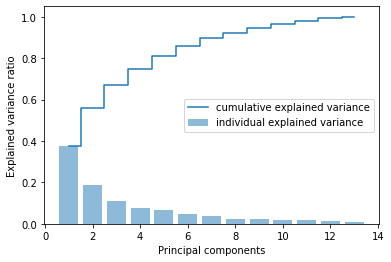

In [11]:

tot = sum(eigen_values)
var_exp = [(i / tot) for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

bar(range(1,14), var_exp, alpha=0.5, align='center',
                  label='individual explained variance')
step(range(1,14), cum_var_exp, where='mid',
                  label='cumulative explained variance')
ylabel('Explained variance ratio')
xlabel('Principal components')
legend(loc='best')
show()

In [0]:
eigen_pairs = \
[(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(reverse=True)

In [13]:
eigen_pairs[:5]


[(4.8923083032737456,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.46635031575923,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048444,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044952,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450259,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543, 

In [14]:

w= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
w.shape

(13, 2)

In [15]:
w


array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [16]:
X_train_std[0]


array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

In [17]:
X_train_std[0].dot(w)


array([2.59891628, 0.00484089])

In [18]:

X_train_pca = X_train_std.dot(w)
X_train_std.shape, w.shape, X_train_pca.shape

((124, 13), (13, 2), (124, 2))

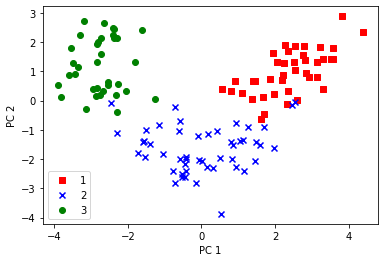

In [19]:

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],
            c=c, label=l, marker=m)
xlabel('PC 1')
ylabel('PC 2')
legend(loc='lower left')
show()

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    xlim(xx1.min(), xx1.max())
    ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                marker=markers[idx], label=cl)

Doing the above steps in PCA

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


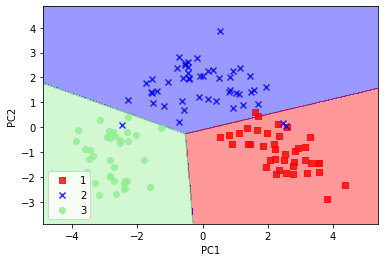

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
xlabel('PC1')
ylabel('PC2')
legend(loc='lower left')
show()

LDA Technique


In [0]:
# http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_2_Linear_Discriminant_Analysis.php

In [23]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92461872 0.05306648]


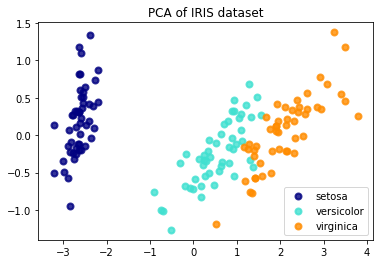

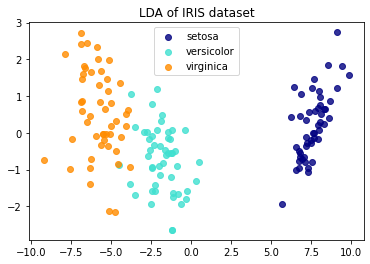

In [24]:
figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
 
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

legend(loc='best', shadow=False, scatterpoints=1)
title('PCA of IRIS dataset')

figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
legend(loc='best', shadow=False, scatterpoints=1)
title('LDA of IRIS dataset')

show()

In [0]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

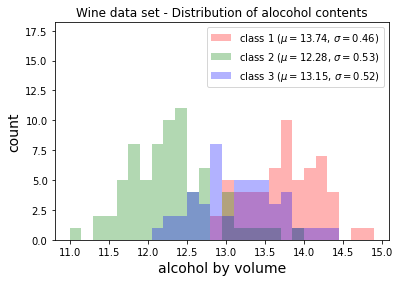

In [27]:
from math import floor, ceil 

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X[:,0])), ceil(max(X[:,0])), 0.15)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,0], bins=bins)[0])

for label,color in zip(range(1,4), colors):
    mean = np.mean(X[:,0][y == label]) # class sample mean
    stdev = np.std(X[:,0][y == label]) # class standard deviation
    hist(X[:,0][y == label], bins=bins, alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev),
             color=color)

ylim([0, max_bin*1.3])
title('Wine data set - Distribution of alocohol contents')
xlabel('alcohol by volume', fontsize=14)
ylabel('count', fontsize=14)
legend(loc='upper right')

show()


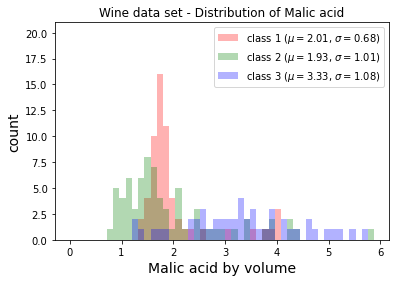

In [28]:
from math import floor, ceil 

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin width of the histogram in steps of 0.12
bins = np.arange(floor(min(X[:,1])), ceil(max(X[:,1])), 0.12)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,1], bins=bins)[0])

for label,color in zip(range(1,4), colors):
    mean = np.mean(X[:,1][y == label]) # class sample mean
    stdev = np.std(X[:,1][y == label]) # class standard deviation
    hist(X[:,1][y == label], bins=bins, alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev),
             color=color)

ylim([0, max_bin])
title('Wine data set - Distribution of Malic acid')
xlabel('Malic acid by volume', fontsize=14)
ylabel('count', fontsize=14)
legend(loc='upper right')

show()

In [29]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [30]:
X_train_std

array([[ 0.9108, -0.4626, -0.0114, ...,  0.6571,  1.9435,  0.937 ],
       [-0.9561, -0.9661, -1.5373, ..., -0.4086,  0.5812, -1.4134],
       [ 0.3595,  1.675 , -0.3747, ..., -1.5595, -1.4485,  0.2868],
       ...,
       [-0.7055, -0.6834, -0.629 , ...,  0.4439,  0.4978, -1.3061],
       [ 1.1489, -0.6216, -0.8833, ..., -0.1955,  1.0121,  0.7745],
       [ 1.4747,  0.1116,  0.4245, ..., -1.4316, -1.2399, -0.2821]])

In [31]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [32]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])


Class label distribution: [40 49 35]


In [33]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [35]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [36]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_vals.shape, eigen_vecs.shape

((13,), (13, 13))

In [37]:
eigen_vals

array([ 0.0000e+00+0.0000e+00j,  1.5644e+02+0.0000e+00j,
        4.5272e+02+0.0000e+00j,  4.1024e-14+0.0000e+00j,
       -3.8709e-14+0.0000e+00j, -2.4012e-14+2.8248e-14j,
       -2.4012e-14-2.8248e-14j, -2.6618e-14+0.0000e+00j,
        1.9061e-14+6.4370e-15j,  1.9061e-14-6.4370e-15j,
       -1.0839e-14+0.0000e+00j,  6.7937e-15+0.0000e+00j,
        7.4193e-16+0.0000e+00j])

In [39]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

452.7215812449744
156.43636121952315
4.1024404771578775e-14
3.8709492498642465e-14
3.70746619342028e-14
3.70746619342028e-14
2.6617956034781537e-14
2.0118798619347737e-14
2.0118798619347737e-14
1.0839236272107771e-14
6.793744707454336e-15
7.419339951757085e-16
0.0


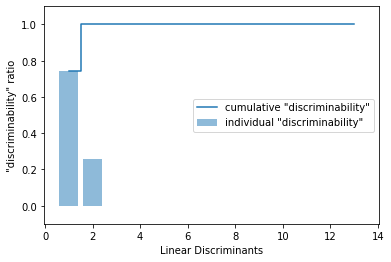

In [40]:

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
ylabel('"discriminability" ratio')
xlabel('Linear Discriminants')
ylim([-0.1, 1.1])
legend(loc='best')
show()

In [41]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, 
               eigen_pairs[1][1][:, np.newaxis].real))
w

array([[-0.0662, -0.3797],
       [ 0.0386, -0.2206],
       [-0.0217, -0.3816],
       [ 0.184 ,  0.3018],
       [-0.0034,  0.0141],
       [ 0.2326,  0.0234],
       [-0.7747,  0.1869],
       [-0.0811,  0.0696],
       [ 0.0875,  0.1796],
       [ 0.185 , -0.284 ],
       [-0.066 ,  0.2349],
       [-0.3805,  0.073 ],
       [-0.3285, -0.5971]])

In [0]:
X_train_lda = X_train_std.dot(w)


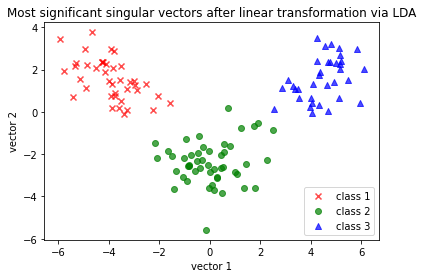

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
transf_lda = sklearn_lda.fit_transform(X_train, y_train)

for label,marker,color in zip(range(1,4),('x', 'o', '^'),('red', 'green', 'blue')):
    scatter(x=transf_lda[:,0][y_train == label],
                y=transf_lda[:,1][y_train == label],
                marker=marker, color=color,
                alpha=0.7, label='class {}'.format(label))

xlabel('vector 1')
ylabel('vector 2')

legend(loc='lower right')
title('Most significant singular vectors after linear transformation via LDA')

show()